# Ananthakrishnan Nair RS

##   The Sparks Foundation - Task -3 (Unsupervised Learning)



## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset and drop unwanted columns

In [8]:
iris = pd.read_csv('H:/iris.csv')
pd.set_option('display.max_columns',None)
iris.drop(['Id','Species'],axis=1,inplace=True)

In [9]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1



## Analysis

In [10]:

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


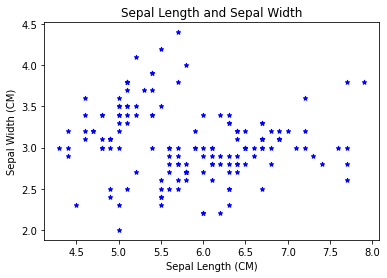

In [16]:
# Relation between Sepal Length and Sepal Width
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',marker='*')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.title('Sepal Length and Sepal Width')
plt.show()

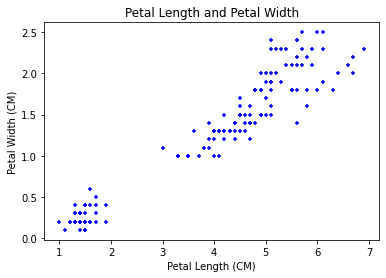

In [18]:
# Relation between Petal Length and Petal Width
iris.plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',marker='+')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.title('Petal Length and Petal Width')
plt.show()


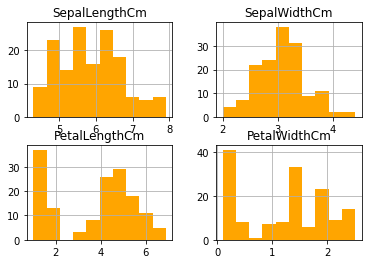

<Figure size 1080x720 with 0 Axes>

In [21]:
# Checking for Distribution
iris.hist(color='orange')
plt.figure(figsize=(15,10))
plt.show()

In [22]:
# Checking for Correlation
corr= iris.corr()
corr


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


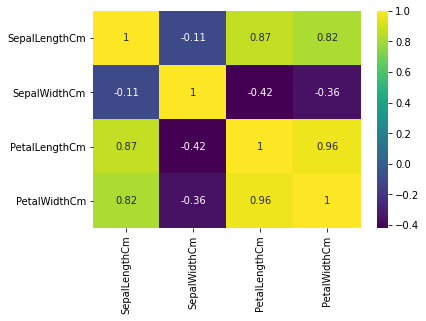

In [23]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='viridis',annot=True)
plt.show()


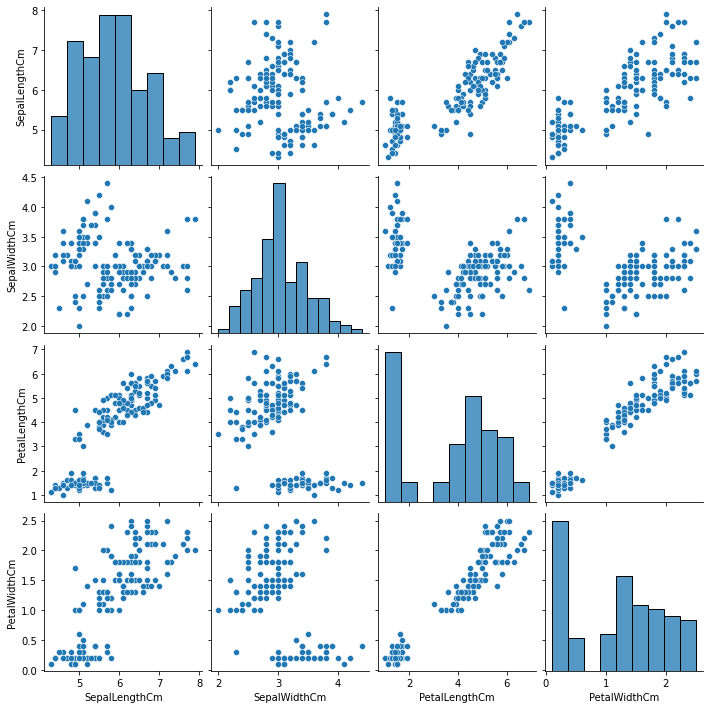

In [24]:
sns.pairplot(iris)


## Elbow method

##### To find the optimal value of k(n_clusters).

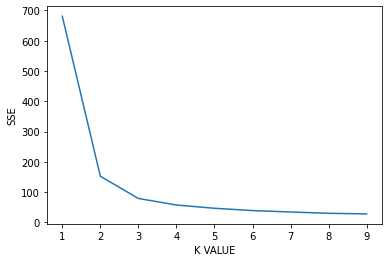

In [26]:
from sklearn.cluster import KMeans
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(iris)
    sse.append(km.inertia_)

plt.plot(k_rng,sse)
plt.xlabel('K VALUE')
plt.ylabel('SSE')
plt.show()

In [28]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(iris)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
iris['clusters'] = y_pred
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [34]:
# Centroids 
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

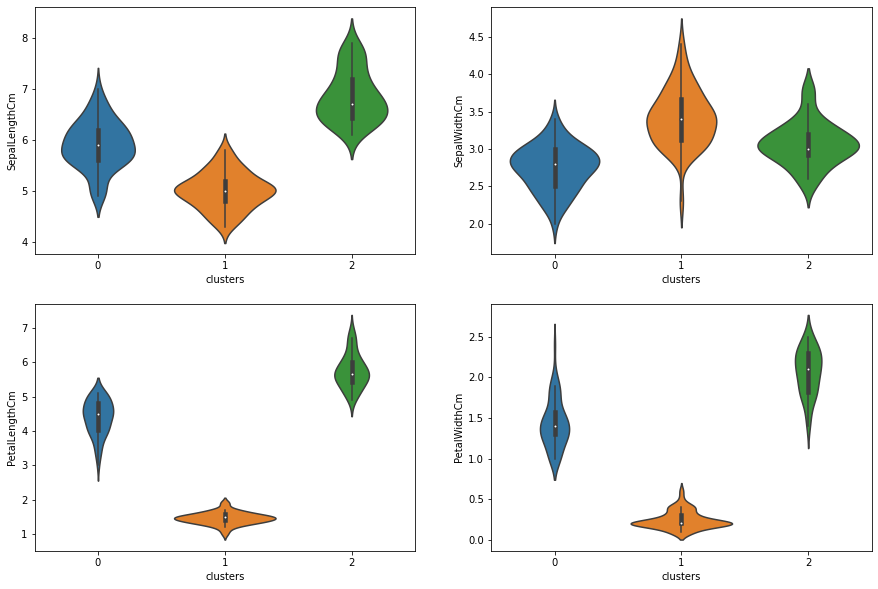

In [35]:
# Violin plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='clusters',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='clusters',y='SepalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='clusters',y='PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='clusters',y='PetalWidthCm', data=iris)

plt.show()

## Ploting the centroides

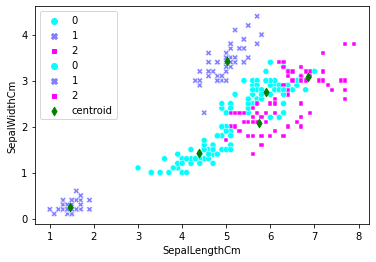

In [45]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='clusters',data=iris,style='clusters',palette='cool')
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='clusters',data=iris,style='clusters',palette='cool')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker='d',label='centroid')
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='green',marker='d')
plt.legend()
plt.show()

## More detailed graph

In [46]:
iris1 = iris[iris['clusters']==0]
iris2 = iris[iris['clusters']==1]
iris3 = iris[iris['clusters']==2]

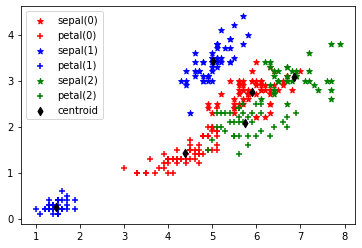

In [47]:
plt.scatter(iris1['SepalLengthCm'],iris1['SepalWidthCm'],color='red',marker='*',label='sepal(0)')
plt.scatter(iris1['PetalLengthCm'],iris1['PetalWidthCm'],color='red',marker='+',label='petal(0)')
plt.scatter(iris2['SepalLengthCm'],iris2['SepalWidthCm'],color='blue',marker='*',label='sepal(1)')
plt.scatter(iris2['PetalLengthCm'],iris2['PetalWidthCm'],color='blue',marker='+',label='petal(1)')
plt.scatter(iris3['SepalLengthCm'],iris3['SepalWidthCm'],color='green',marker='*',label='sepal(2)')
plt.scatter(iris3['PetalLengthCm'],iris3['PetalWidthCm'],color='green',marker='+',label='petal(2)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='d',label='centroid')
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='black',marker='d')
plt.legend()
plt.show()